<a href="https://colab.research.google.com/github/orestes-victor/HENRY_Proyecto_Individual_1_MLOps_Orestes_Victor/blob/main/Notebooks/05_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA de los datasets limpios y elección de las variables para el modelo de recomendación

En esta Jupyter Notebook se realiza el Análisis Exploratorio de los datos de los tres conjuntos de datos ya limpios para finalmente elegir las variables que serán usadas para entrenar el modelo de recomendación solicitado. Esto se hace dado que es un gran volumen de información y los recursos de procesamiento y almacenamiento, sobretodo al momento de deployar el proyecto, son limitados.

### 1.1 - Importación de librerias

---

Las siguientes librerias son comunes en entornos de programación en Python, especialmente en el contexto de análisis de datos y ciencia de datos.

Aquí hay una breve explicación de cada una de ellas:


* **Pandas (import pandas as pd):**

>Pandas es una biblioteca de Python que proporciona estructuras de datos flexibles y herramientas de análisis de datos. La importación as pd es una convención común para abreviar el nombre de la biblioteca y hacer que el código sea más conciso. Pandas es ampliamente utilizado para manipular y analizar conjuntos de datos tabulares.

* **JSON (import json):**

>JSON (JavaScript Object Notation) es un formato de intercambio de datos ligero y legible por humanos. La biblioteca json en Python permite la serialización y deserialización de datos en formato JSON. Puede utilizarse para leer y escribir datos en este formato.

* **AST (import ast):**

>AST (Abstract Syntax Tree) es una representación jerárquica de la estructura sintáctica de un programa en Python. La biblioteca ast permite analizar y manipular el árbol de sintaxis abstracta de un código fuente en Python. Puede ser útil para realizar análisis estático del código.

* **Expresiones Regulares (import re):**

>El módulo re proporciona operaciones de expresiones regulares en Python. Las expresiones regulares son patrones de búsqueda que se utilizan para coincidir con cadenas de texto. Son herramientas poderosas para manipular y buscar patrones específicos en cadenas de texto.

* **%load_ext autoreload y %autoreload 2:**

>Estos comandos son específicos de los cuadernos Jupyter y se utilizan para recargar automáticamente módulos antes de ejecutar una celda. %load_ext autoreload habilita la recarga automática de módulos, y %autoreload 2 configura la recarga automática para que sea más agresiva y recargue incluso las funciones de los módulos.

* **Warnings (import warnings):**

>El módulo warnings proporciona herramientas para controlar las advertencias que emite Python. En este caso, se está configurando para ignorar las advertencias, lo cual puede ser útil para evitar que las advertencias llenen la salida de la consola y distraigan durante la ejecución del código.
En resumen, estas importaciones son comunes en entornos de análisis de datos y ciencia de datos en Python, y proporcionan herramientas para manipular datos, trabajar con JSON, analizar expresiones regulares y controlar advertencias. Además, los comandos %load_ext autoreload y %autoreload 2 son específicos de los cuadernos Jupyter y se utilizan para facilitar el desarrollo interactivo.

* **TextBlob:**

>TextBlob es una biblioteca en Python que proporciona herramientas para el procesamiento de lenguaje natural (NLP). Permite realizar tareas como análisis de sentimientos, extracción de frases clave, etiquetado de partes del discurso, etc.

* **Nltk:**

>La biblioteca nltk (Natural Language Toolkit) es otra herramienta poderosa para el procesamiento de lenguaje natural en Python. Proporciona una serie de módulos y recursos para tareas como tokenización, análisis sintáctico, stemming, entre otras. En este caso, estás importando todo el módulo nltk.

* **csv:**

>csv es un módulo en Python que proporciona funcionalidades para trabajar con archivos CSV (Comma-Separated Values). Los archivos CSV son un formato común para almacenar datos tabulares, donde cada fila del archivo representa una entrada de datos y los valores están separados por comas u otro delimitador.<p/>
El módulo csv en Python proporciona funciones para leer datos desde archivos CSV y escribir datos en archivos CSV. Algunas funciones importantes incluyen csv.reader() para leer un archivo CSV y csv.writer() para escribir en un archivo CSV.




In [ ]:
# Importaciones de bibliotecas necesarias
import pandas as pd  # Pandas para manipulación de datos tabulares
import json  # Módulo para trabajar con JSON
import ast  # Módulo para evaluar expresiones literales de Python
import re  # Módulo para trabajar con expresiones regulares
from textblob import TextBlob # Importa la clase TextBlob desde la biblioteca TextBlob
import nltk # Importa la biblioteca nltk (Natural Language Toolkit)
import csv # Importa el módulo csv en Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Habilita la recarga automática de módulos antes de ejecutar una celda
%load_ext autoreload
%autoreload 2

# Importa el módulo de advertencias y configura para ignorar todas las advertencias
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.2 - Funciones auxiliares

---

**Verificar tipos de datos**

>Verificamos los tipos de datos que contienen las columnas de "df_games".<p> Esta función llamada verificar_tipo_datos toma un DataFrame como entrada y devuelve un nuevo DataFrame que proporciona información sobre los tipos de datos y la cantidad de valores nulos en cada columna del DataFrame de entrada. <p>Esta función proporciona un resumen útil de las características de las columnas en un DataFrame, incluidos los tipos de datos y la cantidad de valores nulos. Es especialmente útil para realizar un análisis inicial de calidad de los datos en un conjunto de datos. <p> Aquí está una descripción detallada de lo que hace:

In [ ]:
def verificar_tipo_datos(df):

    #Se crea un diccionario (mi_dict) con cinco claves: "nombre_campo", "tipo_datos", "no_nulos_%", "nulos_%", y "nulos". Estas claves se utilizarán para almacenar información sobre cada columna del DataFrame.
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    #Se realiza un bucle sobre todas las columnas del DataFrame df.
    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

        # Se calcula el porcentaje de valores no nulos en la columna actual (porcentaje_no_nulos).
        # La columna actual se agrega a la lista bajo la clave "nombre_campo".
        # Se obtiene el tipo de datos único en la columna actual y se agrega a la lista bajo la clave "tipo_datos".
        # Se agrega el porcentaje de valores no nulos a la lista bajo la clave "no_nulos_%".
        # Se agrega el porcentaje de valores nulos a la lista bajo la clave "nulos_%".
        # Se agrega la cantidad de valores nulos en la columna actual a la lista bajo la clave "nulos".

    # Se utiliza el diccionario mi_dict para crear un nuevo DataFrame llamado df_info.
    df_info = pd.DataFrame(mi_dict)

    # La función devuelve el DataFrame df_info que contiene información sobre cada columna, incluidos el nombre de la columna, el tipo de datos, el porcentaje de valores no nulos, el porcentaje de valores nulos y la cantidad de valores nulos.
    return df_info

In [ ]:
def bigote_max(columna):

    # Cuartiles
    q1 = columna.describe()[4]
    q3 = columna.describe()[6]

    # Valor del vigote
    bigote_max = round(q3 + 1.5*(q3 - q1), 2)
    print(f'El bigote superior de la variable {columna.name} se ubica en: $',bigote_max)

    # Cantidad de atípicos
    print(f'Hay {(columna > bigote_max).sum()} valores atípicos en la variable {columna.name}')

## EDA del dataset  `user_reviews`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `user_reviews` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [ ]:
df_reviews = pd.read_csv('/content/drive/MyDrive/HENRY/2_Dataset_limpio/Australian_user_reviews_limpio.csv', encoding='utf-8')
df_reviews.head()

,user_id,user_url,reviews_item_id,reviews_helpful,reviews_recommend,reviews_date,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,1250.0,No ratings yet,True,2011-11-05,1
1,js41637,http://steamcommunity.com/id/js41637,251610.0,15 of 20 people (75%) found this review helpful,True,2014-06-24,1
2,evcentric,http://steamcommunity.com/id/evcentric,248820.0,No ratings yet,True,Formato inválido,2
3,doctr,http://steamcommunity.com/id/doctr,250320.0,2 of 2 people (100%) found this review helpful,True,2013-10-14,2
4,maplemage,http://steamcommunity.com/id/maplemage,211420.0,35 of 43 people (81%) found this review helpful,True,2014-04-15,1


Se revisan los tipos de datos y cantidad de nulos si hay.

In [ ]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_reviews.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_reviews)

La cantidad de registros que hay son: 57375


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,user_id,"[<class 'str'>, <class 'float'>]",100.00,0.00,1
1,user_url,"[<class 'str'>, <class 'float'>]",99.99,0.01,5
2,reviews_item_id,[<class 'float'>],99.99,0.01,8
3,reviews_helpful,"[<class 'str'>, <class 'float'>]",99.99,0.01,8
4,reviews_recommend,"[<class 'bool'>, <class 'float'>]",99.99,0.01,8
5,reviews_date,"[<class 'str'>, <class 'float'>]",99.98,0.02,11
6,sentiment_analysis,[<class 'int'>],100.00,0.00,0


Se tienen 57397 registros de opiniones de los usuarios respecto a los juegos que consumen. Si bien no hay nulos, hay que recordar que en el ETL se observaron datos faltantes en la columna 'reviews_date' donde se rellenó con 'Formato inválido'.

### Columnas 'sentiment_analysis' y 'reviews_recommend'

Se exploran las columnas 'sentiment_analysis' y 'reviews_recommend'.

In [ ]:
def resumen_cant_porcentaje(df, columna):
    '''
    Cuanta la cantidad de True/False luego calcula el porcentaje.

    Parameters:
    - df (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna en el DataFrame para la cual se desea generar el resumen.

    Returns:
    DataFrame: Un DataFrame que resume la cantidad y el porcentaje de True/False en la columna especificada.
    '''
    # Cuanta la cantidad de True/False luego calcula el porcentaje
    counts = df[columna].value_counts()
    percentages = round(100 * counts / len(df),2)
    # Crea un dataframe con el resumen
    df_results = pd.DataFrame({
        "Cantidad": counts,
        "Porcentaje": percentages
    })
    return df_results

In [ ]:
resumen_cant_porcentaje(df_reviews, 'sentiment_analysis')

,Cantidad,Porcentaje
1,35247,61.43
2,17102,29.81
0,5026,8.76


In [ ]:
resumen_cant_porcentaje(df_reviews, 'reviews_recommend')

,Cantidad,Porcentaje
True,50751,88.45
False,6616,11.53


De los registros de reviews casi el 62% de los reviews reflejan sentimientos neutrales, casi el 30% reflejan sentimientos positivos hacia el juego y menos del 9% fue negativo. Pero en el 88% de los reviews se recomiendan los juegos que consumen.

En el siguiente código se busca ver la cantidad de recomendaciones para los distintos sentimientos de las reviews.

In [ ]:
# Se agrupa por 'sentiment_analysis' y 'reviews_recommend'
df_agrupado = df_reviews.groupby(['sentiment_analysis', 'reviews_recommend'])
# Se cuentan la cantidad de reviews en cada grupo
cantidad_grupo = df_agrupado.size()
# Se calcula el porcentaje por cada grupo
porcentaje_grupo = 100 * df_agrupado.size() / len(df_reviews)
# Se crea un datafram con el resumen
sentimiento_recomendacion = pd.DataFrame({
    "Cantidad": cantidad_grupo,
    "Porcentaje": porcentaje_grupo
})
sentimiento_recomendacion

Cantidad  Porcentaje
sentiment_analysis reviews_recommend                      
0                  False                  1652    2.879303
                   True                   3374    5.880610
1                  False                  4367    7.611329
                   True                  30872   53.807407
2                  False                   597    1.040523
                   True                  16505   28.766885

Se puede ver que el porcentaje respecto del total de los reviews que casi el 54% de los reviews que reflejan un sentimiento neutral recomienda el juego por lo que un sentimiento neutral podría estar relacionado con un comentario sencillo sin muchos detalles pero que aún así el juego le gustó como para recomendar. Por otra parte, de los comentarios que reflejaron un sentimiento negativo cerca del 6% aún recomienda el juego, lo que es algo contradictorio.

In [ ]:
# Cantidad de usuarios que dieron su opinion
print(f"Cantidad de usuarios únicos que opinaron: {len(df_reviews['user_id'].unique())}")

Cantidad de usuarios únicos que opinaron: 25140


Un total de 25140 usurarios dieron su opinión sobre el juego que consumen, con lo que un usuario hizo mas de un comentario.

### Columna 'reviews_date'

Se revisan la cantidad de fechas con formato inválido o que no tenían fecha en el conjunto de datos original.

In [ ]:
print(f'La cantidad de fechas en formato inválido son: {len(df_reviews[df_reviews["reviews_date"]=="Formato inválido"])}')

La cantidad de fechas en formato inválido son: 9768


Hay 9768 registros que no contienen la fecha del review.

En el siguiente gráfico se puede ver la distribución de la cantidad de reviews por día, sin tener en cuenta los que no tenía la fecha.

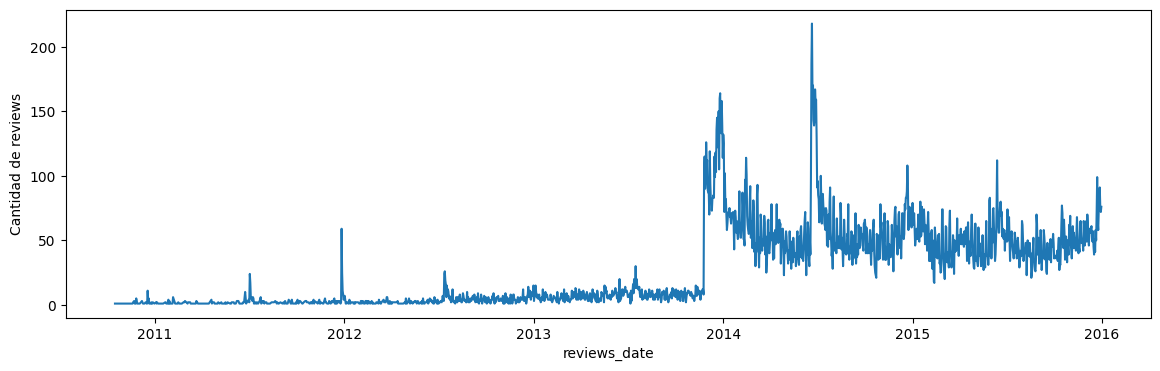

In [ ]:
# Crea una máscara booleana para formatos de fecha válidos y valores no NaN
mask = df_reviews["reviews_date"].notna() & df_reviews["reviews_date"].str.match(r"^\d{4}-\d{2}-\d{2}$")

# Aplica la máscara para filtrar el DataFrame
df = df_reviews[mask]

# Convierte a datetime
df["reviews_date"] = pd.to_datetime(df["reviews_date"])

# Calcula la cantidad de revisiones por fecha
cantidades_revisiones = df["reviews_date"].value_counts().reset_index()

# Renombra las columnas para que coincidan con el gráfico
cantidades_revisiones.columns = ["reviews_date", "reviews_recommend_count"]

# Grafica
plt.figure(figsize=(14, 4))
sns.lineplot(data=cantidades_revisiones, x="reviews_date", y="reviews_recommend_count")
plt.ylabel('Cantidad de reviews')
plt.show()


In [ ]:
print('Días de cantidad pico de reviews')
cantidades_revisiones.sort_values(by="reviews_recommend_count", ascending=False)[:5]

Días de cantidad pico de reviews


,reviews_date,reviews_recommend_count
0,2014-06-21,218
1,2014-06-20,187
2,2014-06-23,170
3,2014-06-27,167
4,2014-06-22,164


Se observa que hasta cerca del 2014 la cantidad de reviews por día es bajo, con algunos picos puntuales y luego aumenta considerablemente la cantidad de comentarios con un pico máximo el 21-06-2014 con 218 comentarios en un solo día.

## EDA del dataset  `steam_games`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `steam_games` que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [ ]:
df_games = pd.read_csv('/content/drive/MyDrive/HENRY/2_Dataset_limpio/Output_steam_games_limpio.csv', encoding='utf-8')
df_games.head()

,genres,price,early_access,id,release_anio,publisher,app_name,title,developer
0,Action,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
1,Casual,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
2,Indie,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
3,Simulation,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro
4,Strategy,4.99,False,761140,2018,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,Kotoshiro


Se revisan los tipos de datos y cantidad de nulos si hay.

In [ ]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_games.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_games)

La cantidad de registros que hay son: 71551


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,genres,[<class 'str'>],100.00,0.00,0
1,price,[<class 'float'>],100.00,0.00,0
2,early_access,[<class 'bool'>],100.00,0.00,0
3,id,[<class 'int'>],100.00,0.00,0
4,release_anio,[<class 'str'>],100.00,0.00,0
5,publisher,"[<class 'str'>, <class 'float'>]",99.97,0.03,22
6,app_name,[<class 'str'>],100.00,0.00,0
7,title,[<class 'str'>],100.00,0.00,0
8,developer,[<class 'str'>],100.00,0.00,0


Este conjunto de datos tiene 9 columnas y 71551 registros. Para recordar, contiene la información relacionada a cada juego como el precio, el año de lanzamiento, el nombre de la aplicación y del juego, el desarrollador y el publicitador, así como el género. Hay que tener en cuenta que la información se repite porque un juego puede pertenecer a mas de un género.

### Columnas 'id', 'app_name' y 'title'

Estas columnas hacen referencia al identificador único del juego y los nombres de la aplicación y del título del juego. Estos últimos no tienen mayor información que analizar en este momento. Con el 'id' se puede calcular la cantidad de juegos.

In [ ]:
total_juegos = len(df_games['id'].unique())
print(f"El total de juegos que hay registrados son: {total_juegos}")

El total de juegos que hay registrados son: 28850


Hay un total de 28850 juegos en la plataforma.

### Columna 'genres'

En el analisis de esta columna podemos ver como se distribuyen los juegos, cuales son las categorias que mas juegos tiene el dataframe

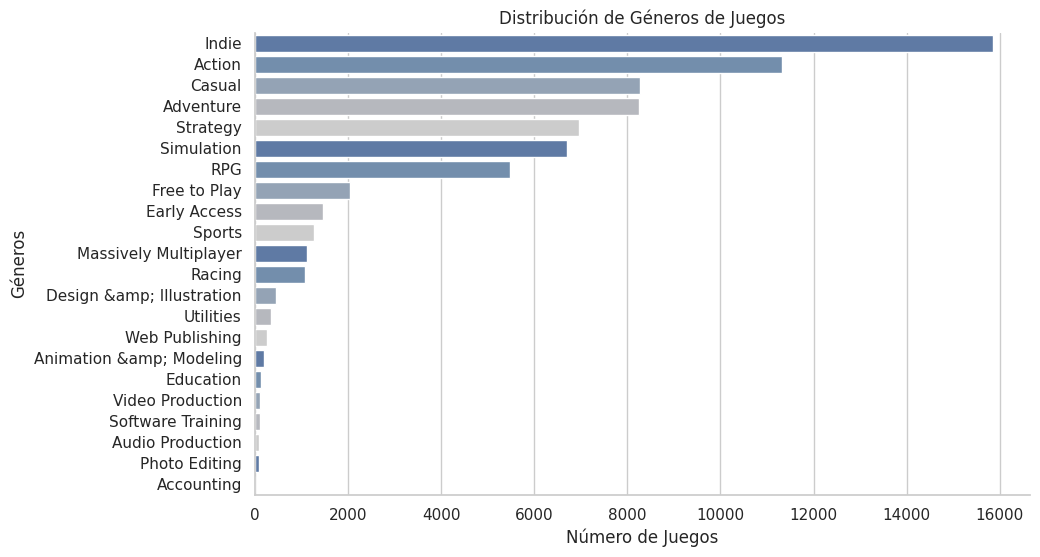

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de seaborn
sns.set(style="whitegrid")

# Ordenar el DataFrame por el recuento de géneros de mayor a menor
df_sorted = df_games['genres'].value_counts().sort_values(ascending=False).reset_index()

# Tamaño y estilo de la figura
plt.figure(figsize=(10, 6))

# Crear una paleta de colores personalizada con un degradado entre azules y grises
custom_palette = sns.color_palette(['#5478af', '#6a8db5', '#8fa2ba', '#b5b7bf', '#ccc'], n_colors=len(df_sorted))

# Crear el gráfico de recuento con la paleta de colores personalizada
ax = sns.barplot(data=df_sorted, x='genres', y='index', orient='h', palette=custom_palette)

# Añadir etiquetas y título
plt.title('Distribución de Géneros de Juegos')
plt.xlabel('Número de Juegos')
plt.ylabel('Géneros')

# Ajustar diseño y mostrar el gráfico
sns.despine()
plt.show()


Y ahora podemos ver lo mismo pero expresado por cantidad y en porcentaje

In [ ]:
resumen_cant_porcentaje(df_games, 'genres')

,Cantidad,Porcentaje
Indie,15858,22.16
Action,11319,15.82
Casual,8282,11.57
Adventure,8242,11.52
Strategy,6957,9.72
Simulation,6699,9.36
RPG,5479,7.66
Free to Play,2031,2.84
Early Access,1462,2.04
Sports,1257,1.76


Los juegos estan categorizados mayormente en las categorías *Indi*, *Action*, *Casual* y *Adventure*. Cabe recordar que un juego puede tener mas de un género asociado.

### Columna 'release_anio'

En esta parte podemos ver la cantidad de juegos lanzados segun el año, vemos que hay un porcentaje grande que no tiene datos de fecha de lanzamiento

In [ ]:
resumen_cant_porcentaje(df_games, 'release_anio')

,Cantidad,Porcentaje
2017,24967,34.89
2016,17667,24.69
2015,12256,17.13
2014,6341,8.86
2013,3016,4.22
2012,2106,2.94
2011,986,1.38
Dato no disponible,850,1.19
2010,653,0.91
2009,486,0.68


Se pueden ver 679 juegos lanzados en años anteriores al 2002 lo que puede ser un error porque la plataforma se lanzó en el 2003. Por otra parte, se observan 850 juegos sin la fecha disponible debido a que no estaba especificada o estaba en un formato incorrecto. Luego se ve el crecimiento constante y lento hasta 2012 y luego crece mas rápidamente hasta 2017. A partir de allí, la plataforma limitó la forma de obtener las estadísticas, por eso se ven muchos menos registros.

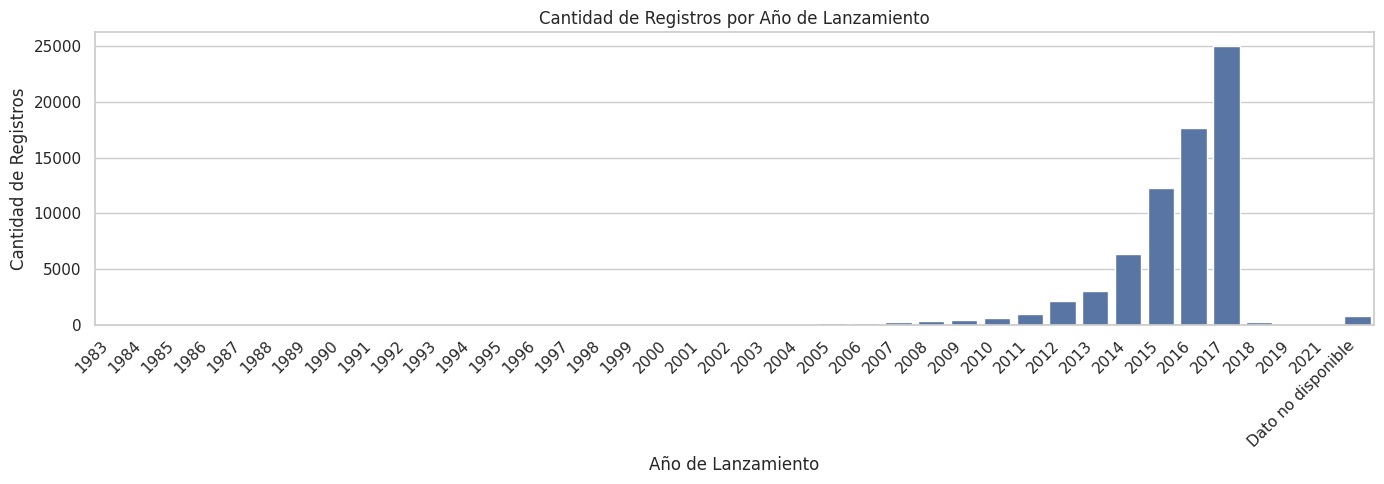

In [ ]:
# Cuenta la frecuencia de cada año
conteo_anios = df_games['release_anio'].value_counts()

# Ordena los valores para que 'Datos no disponibles' queden al principio o al final
conteo_anios = conteo_anios.reindex(['Dato no disponible'] + list(conteo_anios.index))
# Ordena los valores por año
conteo_anios = conteo_anios.sort_index()

# Crear la gráfica de barras
plt.figure(figsize=(14, 5))
sns.barplot(x=conteo_anios.index, y=conteo_anios.values)
plt.xlabel('Año de Lanzamiento') ; plt.ylabel('Cantidad de Registros') ; plt.title('Cantidad de Registros por Año de Lanzamiento')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filtra los registros con valores numéricos en la columna 'release_anio'
registros_numericos = df_games[df_games['release_anio'].str.isnumeric()]
# Convierte la columna 'release_anio' a valores enteros
registros_numericos['release_anio'] = registros_numericos['release_anio'].astype(int)
# Filtra los registros con años de lanzamiento antes de 2002
registros_antes_2002 = registros_numericos[registros_numericos['release_anio'] < 2002]

print(f"Cantidad de registros antes de 2002: {len(registros_antes_2002)}")
print(f"Cantidad de registros 'Dato no disponible': {df_games[df_games['release_anio'] == 'Dato no disponible'].shape[0]}")

Cantidad de registros antes de 2002: 679
Cantidad de registros 'Dato no disponible': 850


### Columnas 'publisher' y 'developer'

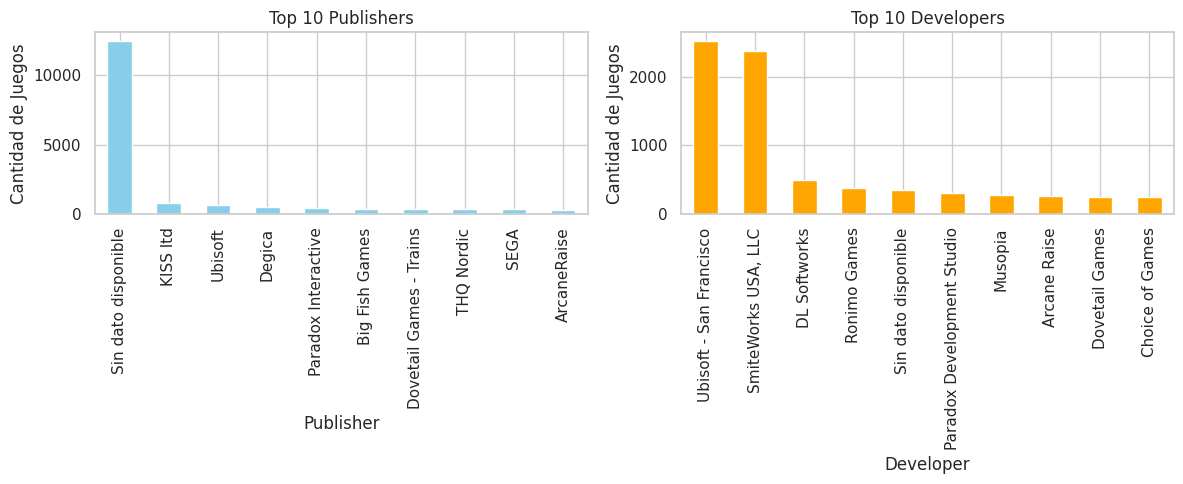

In [ ]:
# Contar la cantidad de juegos por publisher
conteo_publisher = df_games['publisher'].value_counts()

# Contar la cantidad de juegos por developer
conteo_developer = df_games['developer'].value_counts()

# Crear una figura con dos subplots uno al lado del otro
plt.figure(figsize=(12, 5))

# Primer subplot para los publishers
plt.subplot(1, 2, 1)
conteo_publisher[:10].plot(kind='bar', color='skyblue')
plt.xlabel('Publisher') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Publishers')

# Segundo subplot para los developers
plt.subplot(1, 2, 2)
conteo_developer[:10].plot(kind='bar', color='orange')
plt.xlabel('Developer') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 10 Developers')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

En el caso de los publicista de juegos, la mayor cantidad no dispone del dato y en el caso de los desarrolladores, Ubisoft y SmiteWorks son los desarrolladores que mas juegos han desarrollado para la plataforma.

### Columna 'price'

In [ ]:
df_price1 = df_games['price'].sample(200,random_state=5)

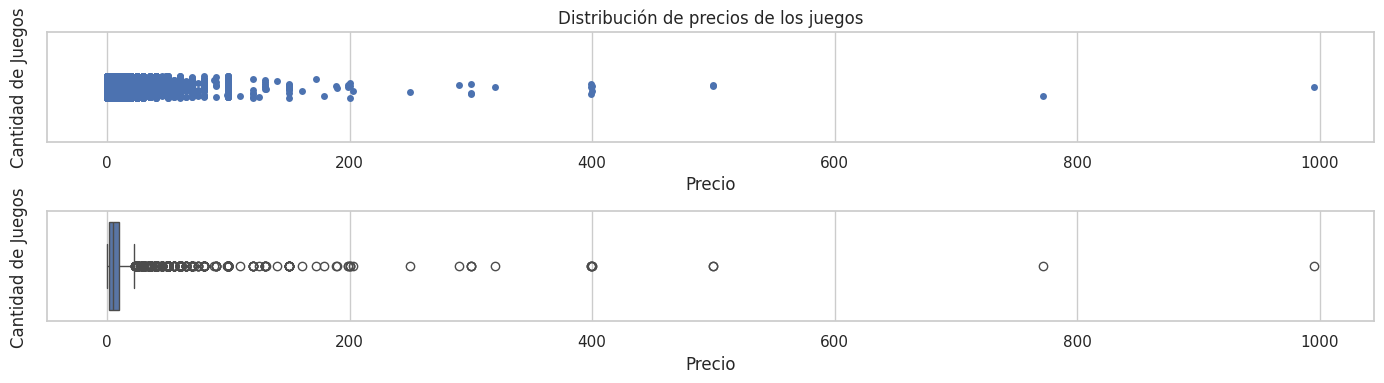

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtiene los precios para cada juego y hace un dataframe
precio_unicos = df_games.groupby('id')['price'].unique().reset_index().explode('price')
df_precio_unicos = precio_unicos['price']

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=precio_unicos, x='price', ax=ax1)
ax1.set_xlabel('Precio')
ax1.set_ylabel('Cantidad de Juegos')
ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=precio_unicos, x='price', ax=ax2)
ax2.set_xlabel('Precio')
ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajusta el espaciado entre subplots
plt.tight_layout()
plt.show()


In [ ]:
estadisticas = df_precio_unicos.astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: $ {estadisticas[5]}')
print(f'El precio promedio (mean) de los juegos es de: $ {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: $ {estadisticas[6]}')
bigote_max(pd.DataFrame(df_precio_unicos.astype(float))['price'])

El precio medio (mediana) de los juegos es de: $ 4.99
El precio promedio (mean) de los juegos es de: $ 8.62
El 75% de los juegos tienen un precio menor de: $ 9.99
El bigote superior de la variable price se ubica en: $ 21.99
Hay 1746 valores atípicos en la variable price


Se puede ver que casi el 50% de los juegos tienen precios entre 0 y los 4.99 dolares y el 75% de los juegos tienen precios inferior a los 9.99 dolares. Se Observan 1746 valores que se pueden considerar atípicos, con precios superior a los 21.99 dolares, pero sin dudas hay algunos juegos de mas de 250 dolares que pueden considerarse errores en los precios.

Ingrese el valor umbral para calcular el porcentaje: 10


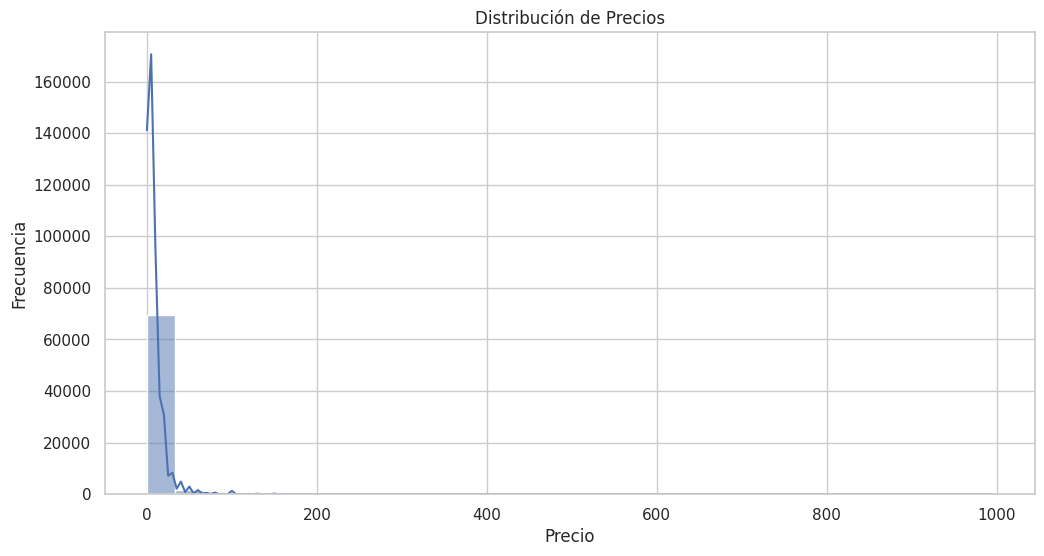

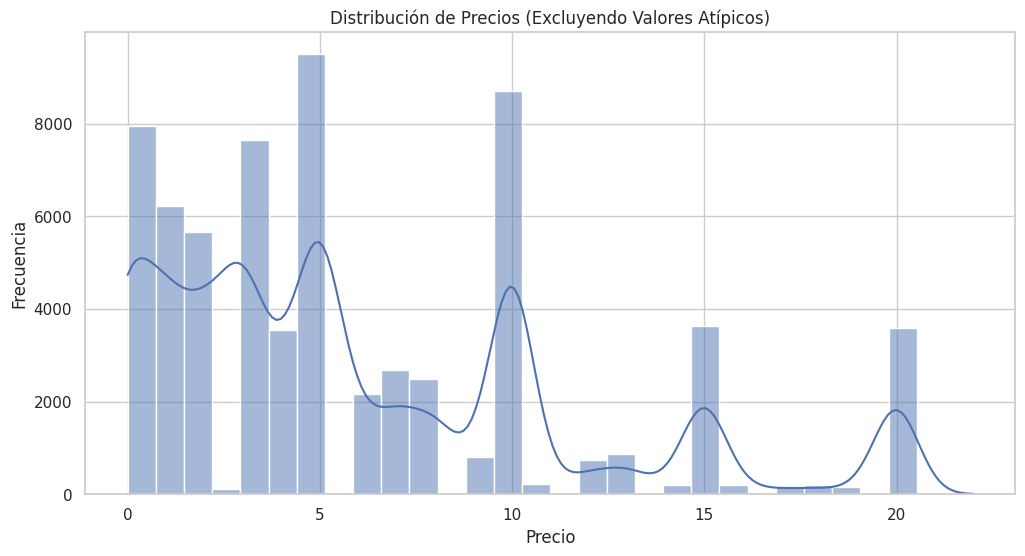

Precio medio (mediana): 4.99
Precio promedio: 8.444273595058071
Porcentaje por debajo de 10.0: 80.38741596902909%
Hay valores atípicos: 4057


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame se llama df_games y la columna de precios es 'price'

# Precio medio (mediana)
precio_medio = df_games['price'].median()

# Precio promedio
precio_promedio = df_games['price'].mean()

# Porcentaje por debajo de un valor específico (ingresado por el usuario)
valor_umbral = float(input("Ingrese el valor umbral para calcular el porcentaje: "))
porcentaje_bajo_umbral = (df_games['price'] < valor_umbral).mean() * 100

# Valores atípicos (outliers)
Q1 = df_games['price'].quantile(0.25)
Q3 = df_games['price'].quantile(0.75)
IQR = Q3 - Q1
valores_atipicos = ((df_games['price'] < (Q1 - 1.5 * IQR)) | (df_games['price'] > (Q3 + 1.5 * IQR)))

# Cantidad de valores atípicos
cantidad_valores_atipicos = valores_atipicos.sum()

# Gráfico para todos los precios
plt.figure(figsize=(12, 6))
sns.histplot(df_games['price'], bins=30, kde=True)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Gráfico excluyendo valores atípicos
plt.figure(figsize=(12, 6))
sns.histplot(df_games.loc[~valores_atipicos, 'price'], bins=30, kde=True)
plt.title('Distribución de Precios (Excluyendo Valores Atípicos)')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir resultados
print(f"Precio medio (mediana): {precio_medio}")
print(f"Precio promedio: {precio_promedio}")
print(f"Porcentaje por debajo de {valor_umbral}: {porcentaje_bajo_umbral}%")
print(f"Hay valores atípicos: {cantidad_valores_atipicos}")


## EDA del dataset  `users_items`

En esta sección se desarrolla el Análisis Exploratorio de los Datos del conjunto `users_items`  que ya pasó por el proceso de ETL.

### Lectura del conjunto de datos

Se leen los datos de .csv y se guarda en un dataframe.

In [ ]:
df_items = pd.read_csv('/content/drive/MyDrive/HENRY/2_Dataset_limpio/Australian_users_items_limpio.csv', encoding='utf-8')
df_items.head()

,item_id,item_name,playtime_forever,steam_id,items_count,user_id,user_url
0,10,Counter-Strike,6,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
1,20,Team Fortress Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
2,30,Day of Defeat,7,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
3,40,Deathmatch Classic,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...
4,50,Half-Life: Opposing Force,0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...


Se revisan los tipos de datos y cantidad de nulos si hay.

In [ ]:
# Se calcula la cantidad de registros
print(f'La cantidad de registros que hay son: {df_items.shape[0]}')
# Se revisan tipos de datos y existencias de nulos
verificar_tipo_datos(df_items)

La cantidad de registros que hay son: 5094105


,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,item_id,[<class 'int'>],100.0,0.0,0
1,item_name,[<class 'str'>],100.0,0.0,0
2,playtime_forever,[<class 'int'>],100.0,0.0,0
3,steam_id,[<class 'int'>],100.0,0.0,0
4,items_count,[<class 'int'>],100.0,0.0,0
5,user_id,[<class 'str'>],100.0,0.0,0
6,user_url,[<class 'str'>],100.0,0.0,0


Este conjunto de datos tiene 7 columnas y 5094105 registros. Para recordar, contiene la información relacionada los usuarios y los juegos que consumen como el tiempo acumulado (en minutos) que han jugado a un juego, la cantidad de items que consumen así como los identificadores de los juegos que consumen y del propio usuario y la url del perfil del mismo.

### Columna 'playtime_forever'

Estas columnas hacen referencia al tiempo en minutos acumulados que un usuario ha jugado.

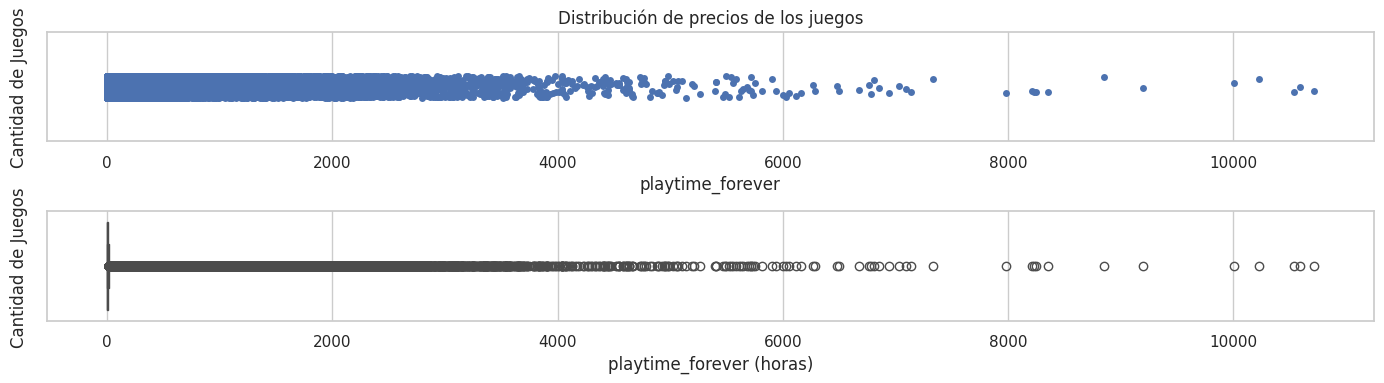

In [ ]:
df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [ ]:
estadisticas = df_items['playtime_hours'].describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
bigote_max(df_items['playtime_hours'])

El precio medio (mediana) de los juegos es de: 0.57
El precio promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un precio menor de: 5.92
El bigote superior de la variable playtime_hours se ubica en: $ 14.79
Hay 763606 valores atípicos en la variable playtime_hours


Se puede observar que cada usuario, por juego, pasa un tiempo medio de 0.57 hs jugando y el 75% de los jugadores estuvieron menos de 6 hs jugando a un juego, pero se observa una gran cantidad de valores atípicos por encima de las 14.79 hs que juega cada usuario a un juego. Esto podría deberse al uso de bots que utilizan el mismo perfil de usuario para jugar en simultaneo, lo que generaría una distorsión de los tiempos reales de juego.

### Columna 'items_count'

Esta columna indica la cantidad de juegos que consumen o compraron alguna vez los usuarios.

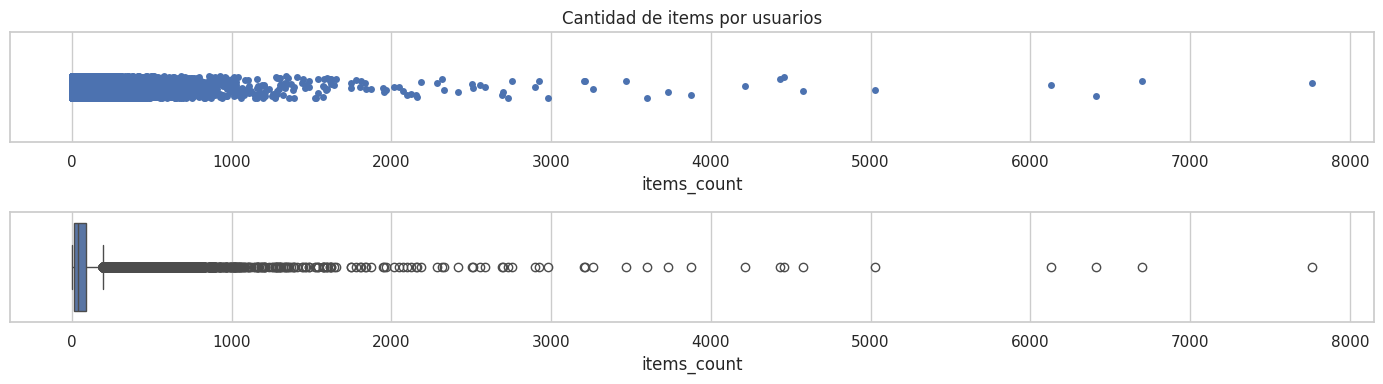

In [ ]:
# Agrupa por usuario la cantidad de items, lo conviente en data frame y los ordena de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajustar el espaciado entre subplots
plt.tight_layout()
plt.show()

In [ ]:
estadisticas = items_count_user['items_count'].astype(float).describe()
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas[5],2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas[1],2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas[6],2)}')
bigote_max(items_count_user.astype(float)['items_count'])

El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0
El bigote superior de la variable items_count se ubica en: $ 196.5
Hay 4957 valores atípicos en la variable items_count


<Figure size 1400x500 with 0 Axes>

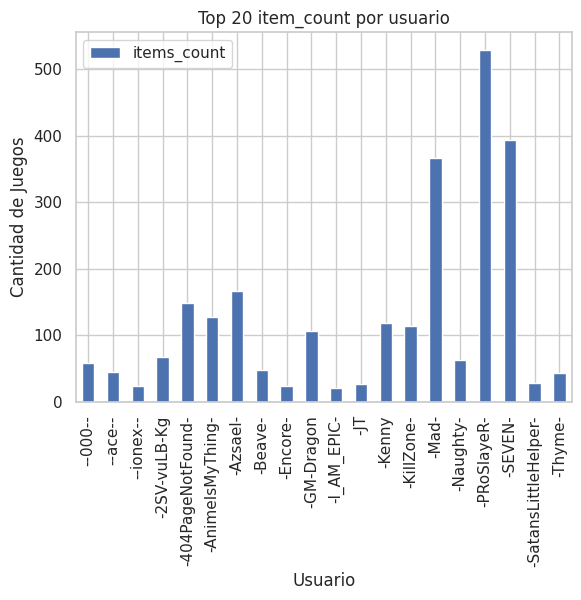

In [ ]:
# Grafica cantidad de item por usuarios
plt.figure(figsize=(14, 5))
items_count_user[:20].plot(kind='bar')
plt.xlabel('Usuario') ; plt.ylabel('Cantidad de Juegos') ; plt.title('Top 20 item_count por usuario')
plt.show()

Se puede ver que el usuario que mas cantidad de juegos a consumido ronda los 8000 juegos, pero el 75% de los usuarios ha adquirido menos de 87 items. Se pueden ver 4957 usuarios que hay adquirido mas de 196 items que podrían considerarse como atípicos.